### IV. Data Visualizations

The aim of this notebook is to show some visualization of the existing data set.

For this purpose, I shall do some very basic data preparation, and then proceed to explore and visualize data.

Note: **Data preparation undertaken in this notebook differs from data preparation undertaken on ¨Data Preparation¨ notebook**. The reason is that data prepartion serves to different purposes, in this notebook data is prepared for visualizations. And on the other one, for Machine Learning algorithm creation

    
 

In [1]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%matplotlib inline

### 1. Import and merge data sets

In [2]:
#import first data set
autos=pd.read_csv('autos.csv',sep=',')
autos.shape

(216, 26)

In [3]:
#View data
autos.head(2)

,symboling,normalized-losses,make-id,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [4]:
#import second data set
makes=pd.read_csv('makes.csv',sep=',')
makes.shape

(22, 2)

In [5]:
# Merge the two datasets
df= pd.concat([autos,makes],axis=1)
df.shape

(216, 28)

In [6]:
df.head()

,symboling,normalized-losses,make-id,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make-id,make
0,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1.0,alfa-romero
1,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,2.0,audi
2,1,NaN,1,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,3.0,bmw
3,2,164.0,2,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4.0,chevrolet
4,2,164.0,2,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5.0,dodge


In [7]:
#column list
df.columns

Index(['symboling', 'normalized-losses', 'make-id', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make-id', 'make'],
      dtype='object')

To avoid problems, I changed the names replacing sign '-' by '_' in column names

In [8]:
old_names = ['symboling', 'normalized-losses', 'make-id', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make-id', 'make'] 
new_names = ['symboling', 'normalized_losses', 'make_id', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'make_id', 'make']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [9]:
df.head()

,symboling,normalized_losses,make_id,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_id,make
0,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1.0,alfa-romero
1,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,2.0,audi
2,1,NaN,1,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,3.0,bmw
3,2,164.0,2,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4.0,chevrolet
4,2,164.0,2,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5.0,dodge


In [10]:
df.shape

(216, 28)

### 2. Drop duplicate rows and columns

In [11]:
#drop duplicate rows (using subset, I drop raws where values of columns mentioned match)
df.drop_duplicates(subset=['symboling', 'normalized_losses', 'make_id', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'make_id', 'make'], inplace = True)

In [12]:
#see shape after duplicate row removal
df.shape

(205, 28)

11 rows have been deleted

In [13]:
# remove duplicate columns
_, i = np.unique(df.columns, return_index=True)
df=df.iloc[:, i]
df.shape

(205, 27)

1 column has been deleted

### 3. Handle Missing values

In [14]:
df.isnull().mean()

aspiration           0.000000
body_style           0.000000
bore                 0.019512
city_mpg             0.000000
compression_ratio    0.000000
curb_weight          0.000000
drive_wheels         0.000000
engine_location      0.000000
engine_size          0.000000
engine_type          0.000000
fuel_system          0.000000
fuel_type            0.000000
height               0.000000
highway_mpg          0.000000
horsepower           0.009756
length               0.000000
make                 0.892683
make_id              0.000000
normalized_losses    0.200000
num_of_cylinders     0.000000
num_of_doors         0.009756
peak_rpm             0.009756
price                0.019512
stroke               0.019512
symboling            0.000000
wheel_base           0.000000
width                0.000000
dtype: float64

In [15]:
# let's no determine how many variables we have with missing information

vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]
print('Total variables that contain missing information: ', len(vars_with_na))

Total variables that contain missing information:  8


In [16]:
# Drop 'make'column since it has too many nulls
df=df.drop('make', axis=1)

To keep it simple I will:

    a) replace nulls from numerical variables by their mean

    b) replace nulls from categorical variables by the most frequent category

In [17]:
df.dtypes

aspiration            object
body_style            object
bore                 float64
city_mpg               int64
compression_ratio    float64
curb_weight            int64
drive_wheels          object
engine_location       object
engine_size            int64
engine_type           object
fuel_system           object
fuel_type             object
height               float64
highway_mpg            int64
horsepower           float64
length               float64
make_id                int64
normalized_losses    float64
num_of_cylinders      object
num_of_doors          object
peak_rpm             float64
price                float64
stroke               float64
symboling              int64
wheel_base           float64
width                float64
dtype: object

Handle numerical:
    - normalized_losses, price, stroke, horsepower, peak_rpm

In [18]:
for var in ['bore','stroke','price','peak_rpm',
           'horsepower','normalized_losses']:
    df[var].fillna(df[var].median(), inplace=True)

Handle categorical: num_of_doors

In [19]:
# find most frequent category in 'num-of-doors'
df.groupby(['num_of_doors'])['num_of_doors'].count().sort_values(ascending=False).index[0]

'four'

In [20]:
# let's create a variable to replace NA with the most frequent label
# both in train and test set

def impute_na(variable):
    most_frequent_category = df.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df[variable].fillna(most_frequent_category, inplace=True)


In [21]:
# and let's replace the NA
for variable in ['num_of_doors',]:
    impute_na(variable)

Let's see if I did well and there are no more nulls

In [22]:
# check absence of null values
for var in df.columns:
    if df[var].isnull().sum()>0:
        print(var, df[var].isnull().sum())

Yeah! No more NA!

#### 1.  General Data Exploration

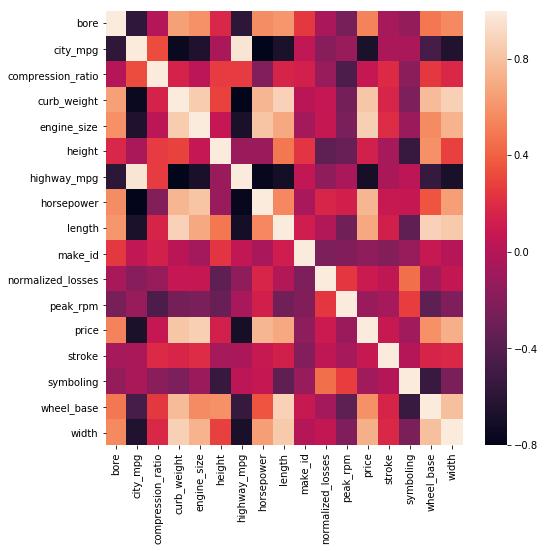

In [23]:
# Let's observe the existing correlations between dataset
plt.figure(figsize=(8,8)) 

sns.heatmap(df.corr())

This chart shows some very interesting correlations, such as :
- price and curve_weight or engine_size
- city_mpg and highway_mpg
- length and wheel_base
- curb_weight and width and so on.

I will need to take care of this existing correlations when handling the feature selection in order to prevent overfitting. 


#### 2. Label or Target Exploration

In [24]:
## Descriptive statistics for label (in this case it will be attractiveness)
df.price.describe()

count      205.000000
mean     13150.307317
std       7879.121326
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

From the describe statistics, it looks like data is skewed. We'll check the Histogram to confirm

(array([53., 53., 24., 20., 25.,  7.,  5.,  2.,  2.,  2.,  4.,  5.,  0.,
         2.,  1.]),
 array([ 5118.        ,  7803.46666667, 10488.93333333, 13174.4       ,
        15859.86666667, 18545.33333333, 21230.8       , 23916.26666667,
        26601.73333333, 29287.2       , 31972.66666667, 34658.13333333,
        37343.6       , 40029.06666667, 42714.53333333, 45400.        ]),
 <a list of 15 Patch objects>)

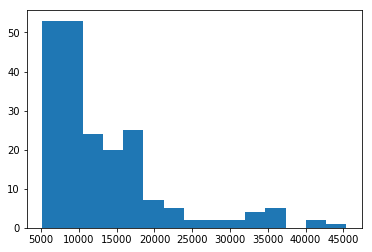

In [25]:
plt.hist(df.price,15)


Label is highly skewed. 
In fact, we could try to modify this column by using its log function. However, since it's the Target and not just a variable, undertaking this change could probably help me get a model to predict better the logarithm of the price, but not the price. 

In [26]:
df.columns

Index(['aspiration', 'body_style', 'bore', 'city_mpg', 'compression_ratio',
       'curb_weight', 'drive_wheels', 'engine_location', 'engine_size',
       'engine_type', 'fuel_system', 'fuel_type', 'height', 'highway_mpg',
       'horsepower', 'length', 'make_id', 'normalized_losses',
       'num_of_cylinders', 'num_of_doors', 'peak_rpm', 'price', 'stroke',
       'symboling', 'wheel_base', 'width'],
      dtype='object')

#### 2.1 Exploring relationships between label and numerical features

In [27]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 9 categorical variables


['aspiration',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'fuel_system',
 'fuel_type',
 'num_of_cylinders',
 'num_of_doors']

In [28]:
# Find temporal varibles
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!='O']

# list of variables that contain year information
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var or 'Day'in var or 'Month'in var or 'Time'in var]
print('There are {} temporal variables'.format(len(year_vars)))


year_vars

There are 0 temporal variables


[]

In [29]:
# let's visualise the values of the discrete variables
discrete = []

for var in numerical:
    if len(df[var].unique())<20 and var not in year_vars:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))
discrete

symboling  values:  [ 3  1  2  0 -1 -2]

There are 1 discrete variables


['symboling']

In [30]:
### Find Continuous
# let's remember to skip the Id variable and the target variable SalePrice, which are both also numerical

numerical = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice'] and var not in year_vars]
print('There are {} numerical and continuous variables'.format(len(numerical)))
numerical

There are 16 numerical and continuous variables


['bore',
 'city_mpg',
 'compression_ratio',
 'curb_weight',
 'engine_size',
 'height',
 'highway_mpg',
 'horsepower',
 'length',
 'make_id',
 'normalized_losses',
 'peak_rpm',
 'price',
 'stroke',
 'wheel_base',
 'width']

From the Algorithm selection notebook, I know the most important variables are:

- num_of_cylinders (cat)
- curb_weight
- normalized_losses
- stroke
- horsepower
- bore
- num_of_doors (cat)

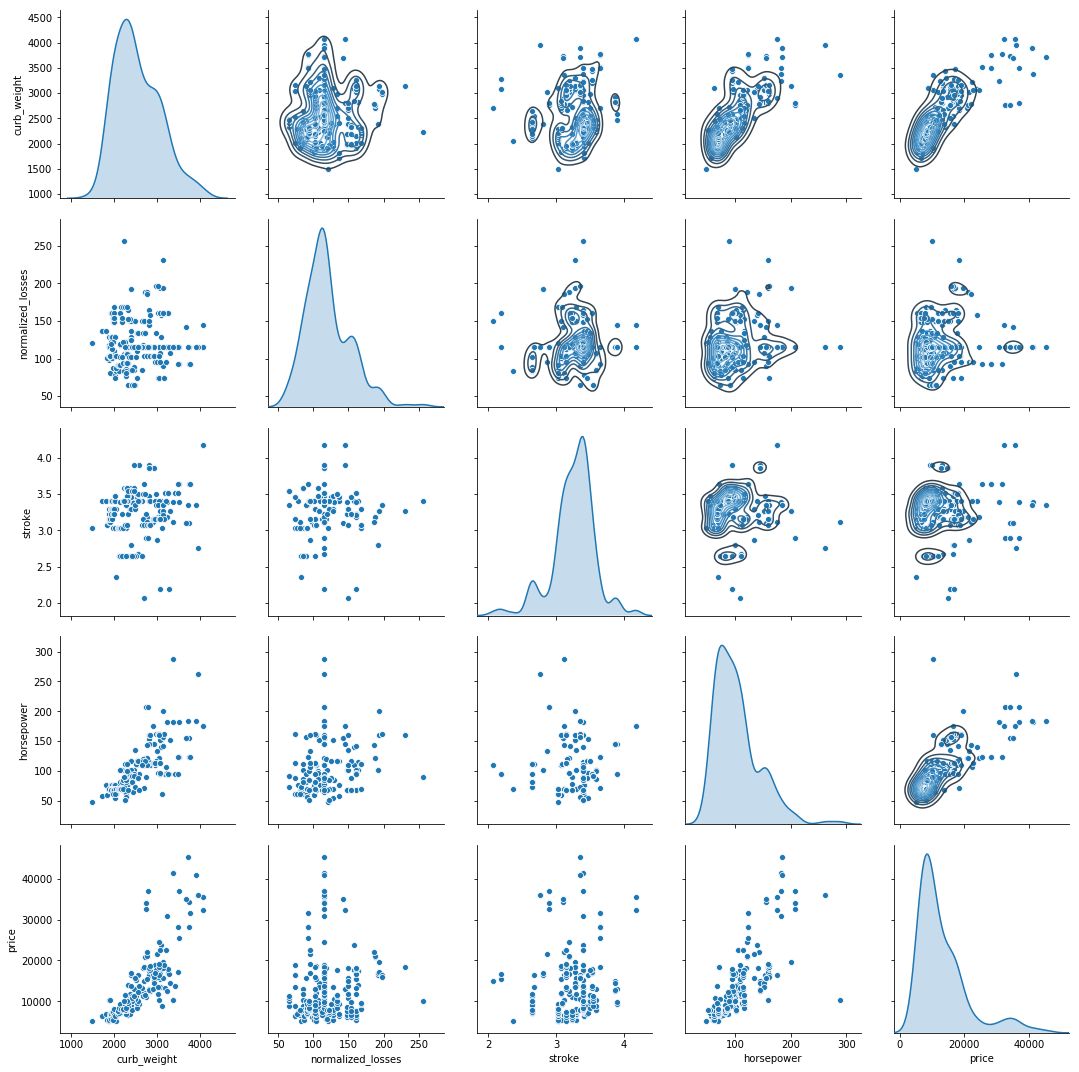

In [31]:
## Create scatter-plot matrix of most important correlations with the label


num_cols1 = ["curb_weight", "normalized_losses","stroke", "horsepower","price"] 
sns.pairplot(df[num_cols1], diag_kind="kde", size=3).map_upper(sns.kdeplot, cmap="Blues_d")

* Looking at the last row, we can see com clear linear correlations with the LABEL, such as curb_weight and horsepower.
* On the upper digonal, we can see some different concentration, probably showing a tendence hidden in data.
* Also, we can see the presence of dots far away from the main stream of dots, which are the outliers.

#### 2.2 Exploring relationships between label and categorical features

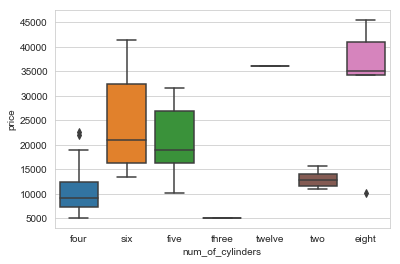

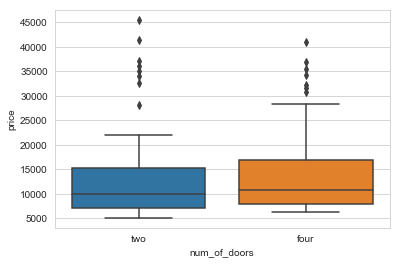

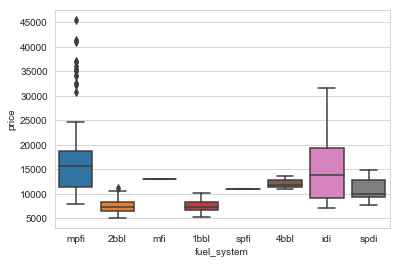

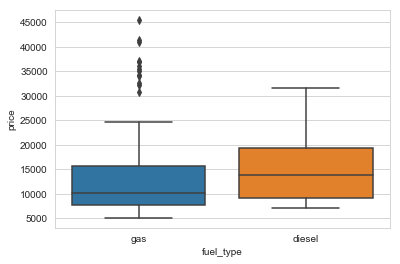

In [32]:
def plot_box(df, cols, col_y='price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
        
cat_cols = ['num_of_cylinders','num_of_doors','fuel_system','fuel_type']
plot_box(df, cat_cols)   

When observing the relationship between the label and the categorical variables, we can see that

* Except for number_of_doors, we can see in all other categorical variables median of price depending on the category.
* Biggest price difference between categories can be observed on the numeber of cylinders. Price median swifts depending between categories
    

#### 2.3 Using Aesthetics to explore relationships between label and numerical/categorical features

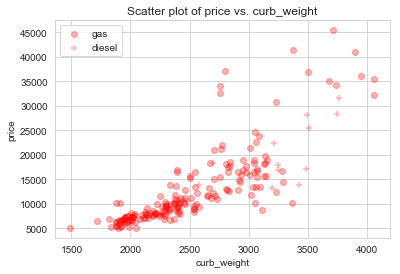

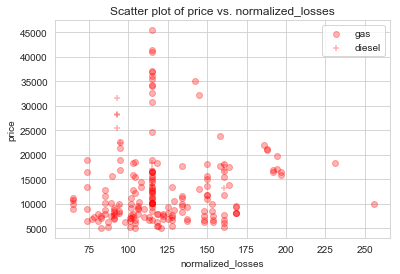

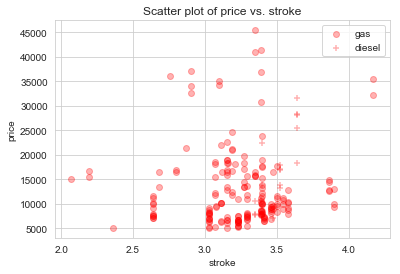

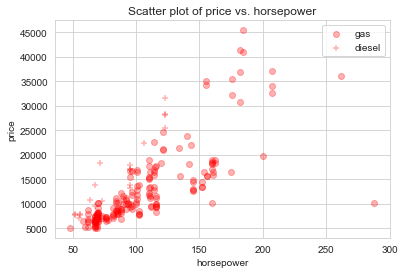

In [33]:
def plot_scatter_shape(df, cols, shape_col = 'fuel_type', col_y = 'price', alpha = 0.3):
    shapes = ['o', '+', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = df[df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'red')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ["curb_weight", "normalized_losses","stroke", "horsepower"]
plot_scatter_shape(df, num_cols) 

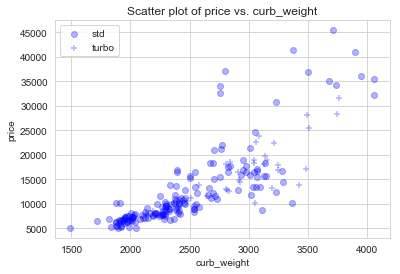

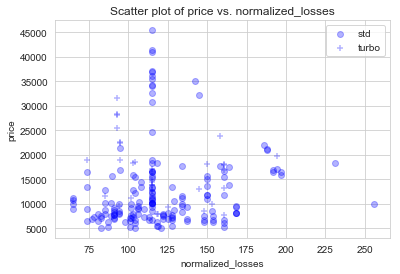

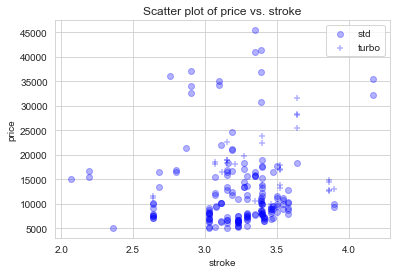

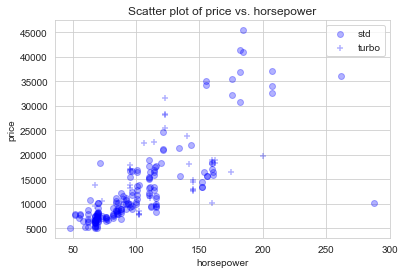

In [34]:
def plot_scatter_shape(df, cols, shape_col = 'aspiration', col_y = 'price', alpha = 0.3):
    shapes = ['o', '+', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = df[df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ["curb_weight", "normalized_losses","stroke", "horsepower"]
plot_scatter_shape(df, num_cols) 

Using aesthetics, we can visualize and better understand data:

We can see how price changes, based on the categorical variables, and at the same time split by the aspiration type, or the fuel_type
    

I could do more visual representations, but I guess those shown above are good enough to have an idea of how data behaves to determine the price of an automovile.